## 5.7　モデル定義


In [1]:
# !pip install japanize_matplotlib | tail -n 1
# !pip install torchviz | tail -n 1
# !pip install torchinfo | tail -n 1

In [2]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import japanize_matplotlib
import torch.optim as optim
import matplotlib.pyplot as plt
from torchviz import make_dot
from torchinfo import summary
from IPython.display import display

In [3]:
%matplotlib inline

In [4]:
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)
x_org = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

print('元データ', x_org.shape, yt.shape)
print('項目名: ', feature_names)

元データ (506, 13) (506,)
項目名:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
x = x_org[:, feature_names == 'RM']
print('絞り込み後', x.shape)
print(x[:5, :])

print('正解データ')
print(yt[:5])

絞り込み後 (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
正解データ
[24.  21.6 34.7 33.4 36.2]


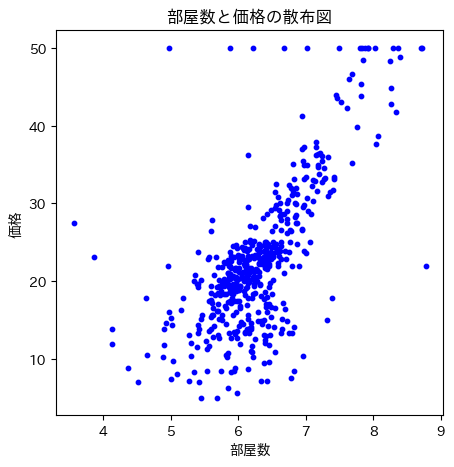

In [6]:
plt.figure(figsize=(5, 5))
plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.title('部屋数と価格の散布図')
plt.show()

In [7]:
n_input = x.shape[1]
n_output = 1
print(f'入力次元数: {n_input} 出力次元数: {n_output}')

入力次元数: 1 出力次元数: 1


In [8]:
class Net(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()
    self.l1 = nn.Linear(n_input, n_output)

    nn.init.constant_(self.l1.weight, 1.0)
    nn.init.constant_(self.l1.bias, 1.0)

  def forward(self, x):
    x1 = self.l1(x)
    return x1

In [9]:
net = Net(n_input, n_output)

In [10]:
# outputs = net(inputs)

In [11]:
for parameter in net.named_parameters():
  print(f'変数名: {parameter[0]}')
  print(f'変数値: {parameter[1].data}')

変数名: l1.weight
変数値: tensor([[1.]])
変数名: l1.bias
変数値: tensor([1.])


In [12]:
for parameter in net.parameters():
  print(parameter)

Parameter containing:
tensor([[1.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [13]:
print(net)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [14]:
summary(net, (1,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [15]:
criterion = nn.MSELoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)